In [6]:
import tensorflow as tf


In [7]:
from tensorflow import keras


In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [9]:
# step 1 now loading mnist data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(y_train[:20])  # print first 20 labels
print(f"Min label: {y_train.min()}, Max label: {y_train.max()}")
print(f"Shape of y_train: {y_train.shape}")

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
Min label: 0, Max label: 9
Shape of y_train: (60000,)


In [10]:
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (

(60000, 28, 28)
(60000,)


In [11]:
# now i should regularize the pixel values from 0 - 255 to 0-1 ,, so divide the values by 225

x_train = x_train/255
x_test = x_test/255

In [12]:
# What does to_categorical(y_train, 10) do? =>
# It converts the integer class labels into one-hot encoded vectors.
# Neural networks with softmax output layers expect probability distributions (i.e., vectors).
# One-hot encoding allows the model to compute a categorical cross-entropy loss, which compares predicted probabilities vs. the true class.

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
# now build the layers 1. input,hidden,output,,,we are using rely to normalize again as it would have changed after going through layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
model = Sequential([Flatten(input_shape = (28,28)),
                   Dense(128,activation= 'relu',kernel_regularizer=l2(0.001)),
                   Dropout(0.2)
                   ,Dense(64,activation = 'relu',kernel_regularizer=l2(0.001)),
                   Dropout(0.2),
                   Dense(10,activation = 'softmax')])



/Users/sasikala/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
print(x_train.shape)  # should be (60000, 28, 28)
print(y_train.shape)  # should be (60000, 10) after one-hot encoding


(60000, 28, 28)
(60000, 10)


In [15]:
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer = 'adam',
              loss = 'CategoricalCrossentropy',
              metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs=20, batch_size=40, validation_split=0.2)

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7995 - loss: 0.8562 - val_accuracy: 0.9545 - val_loss: 0.3256
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9356 - loss: 0.3742 - val_accuracy: 0.9635 - val_loss: 0.2636
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9500 - loss: 0.3050 - val_accuracy: 0.9549 - val_loss: 0.2653
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9544 - loss: 0.2780 - val_accuracy: 0.9663 - val_loss: 0.2326
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9554 - loss: 0.2673 - val_accuracy: 0.9701 - val_loss: 0.2136
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9582 - loss: 0.2540 - val_accuracy: 0.9690 - val_loss: 0.2162
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9601 - loss: 0.2472 - val_accuracy: 0.9697 - val_loss: 0.2097
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9613 - loss: 0.2403 - 

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9656 - loss: 0.2040

Test accuracy: 0.972599983215332


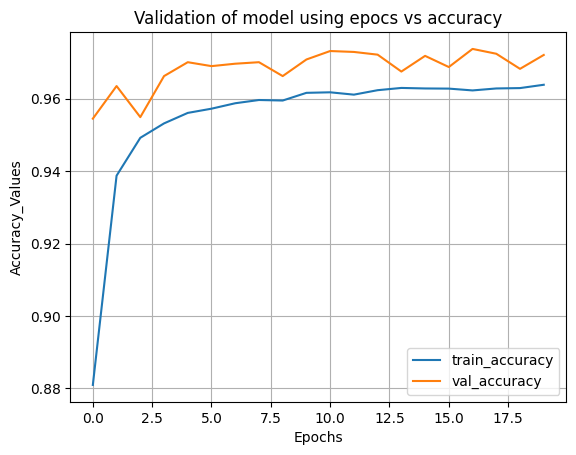

In [17]:
# plotting values to see performance

plt.plot(history.history['accuracy'],label = 'train_accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title("Validation of model using epocs vs accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy_Values')
plt.grid(True)
plt.legend()
plt.show()


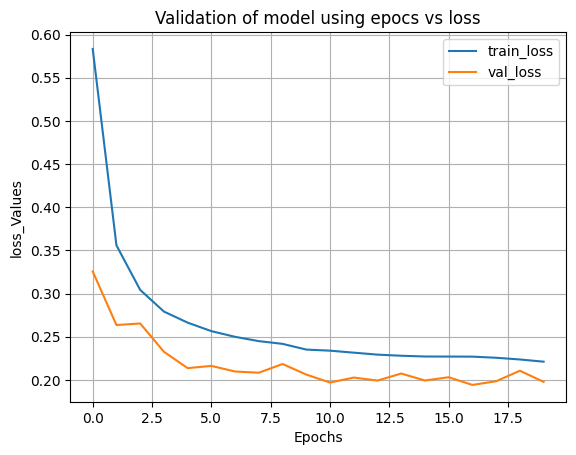

In [18]:
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.title("Validation of model using epocs vs loss")
plt.xlabel('Epochs')
plt.ylabel('loss_Values')
plt.grid(True)
plt.legend()
plt.show()